In [4]:
#Ejercicio: separar dos nubes e puntos mediante una circunferencia, en la que una nube se encuentra contenida dentro de otra

import numpy as np 
import scipy as sc

import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

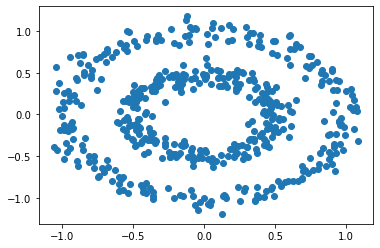

In [5]:
#CREAR EL DATASET

n = 500 #número de datos en el registro

p = 2 #número de características que tienen los datos en el registro

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.07) #factor es la distancia entre las dos nubes de puntos. El ruido dispersa los puntos
#En este dataset, la primera caracteristica (la X) es la coordenada de cada uno de los puntos. La segunda característica es un vector binario que indica a cual de las dos nubes de puntos pertenece cada punto

#pintemos las dos nubes de puntos
plt.scatter(X[:,0], X[:,1])
plt.show()

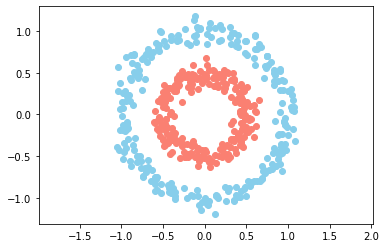

In [6]:
#vamos a pintar de color distinto cuando un punto pertenezca a un conjunto o a otro

plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue") #cuando pertenezca al conjunto 0
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon") #cuando pertenezca al conjunto 1

plt.axis("equal") #para tener una gráfica proporcionada en ambos ejes
plt.show()

In [9]:
#Vamos a crear una capa modelo para crear a partir de ella más capas. Para ello definimos una clase asociada a dicha capa
class neural_layer():

    def __init__(self, n_neur, n_conn, act_f):
    #el self es para definir, e introducimos los elementos necesarios en una capa, que son: el número de conexiones entrantes (n_conn) que entran desde la capa anterior, por supuesto el número de neuronas que tiene la capa (n_neur), y por último la función de activación que estamos usando (act_f) ya sea la sigmoide, RELU...

        self.act_f = act_f #inicializamos nuestra función de activación

        #definimos ahora el vector de término independiente de nuestra ecuación matricial, el cual sabemos que es un vector columna de la misma dimensión que neuronas tiene la capa. Vamos a inicializarlo de forma aleatoria, con el valor centrado en cero (normalizada) y de rango -1, 1
        self.B = np.random.rand(1, n_neur) * 2 - 1

        #y ahora inicializamos nuestra matriz de parámetros, que la vamos a inicializar de la misma manera, teniendo en cuenta que se trata de una matriz con altura el numero de neuronas (como el vector) y de ancho el número de conexiones que llegan de la capa anterior
        self.W = np.random.rand(n_conn, n_neur) * 2 - 1



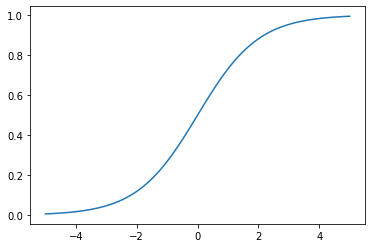

In [10]:
#Definimos a continuación las funciones de activación. Éstas proporcionan no linealidades a la suma ponderada de nuestro modelo (ya que si mezclamos muchas funciones lineales, el resultado es una función lineal )

#vamos a inicializarla como funciones anónimas (funciones a las que les podremos pasar parámetros luego)

sigm = lambda x: 1 / (1 + np.e ** (-x)) 


#esto que vamos a hacer ahora es un auxiliar de este apartado para ver una manera sencilla de poder representar una función cualquiera en cualquier intervalo
x = np.linspace(-5, 5, 100) #creamos un vector entre -5 y 5 con 100 valores, para sustituirlos en la fórmula y ver la gráfica

plt.plot(x, sigm(x))